In [ ]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [ ]:
sales_of_company_x = sales_of_company_x.iloc[:,1]

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


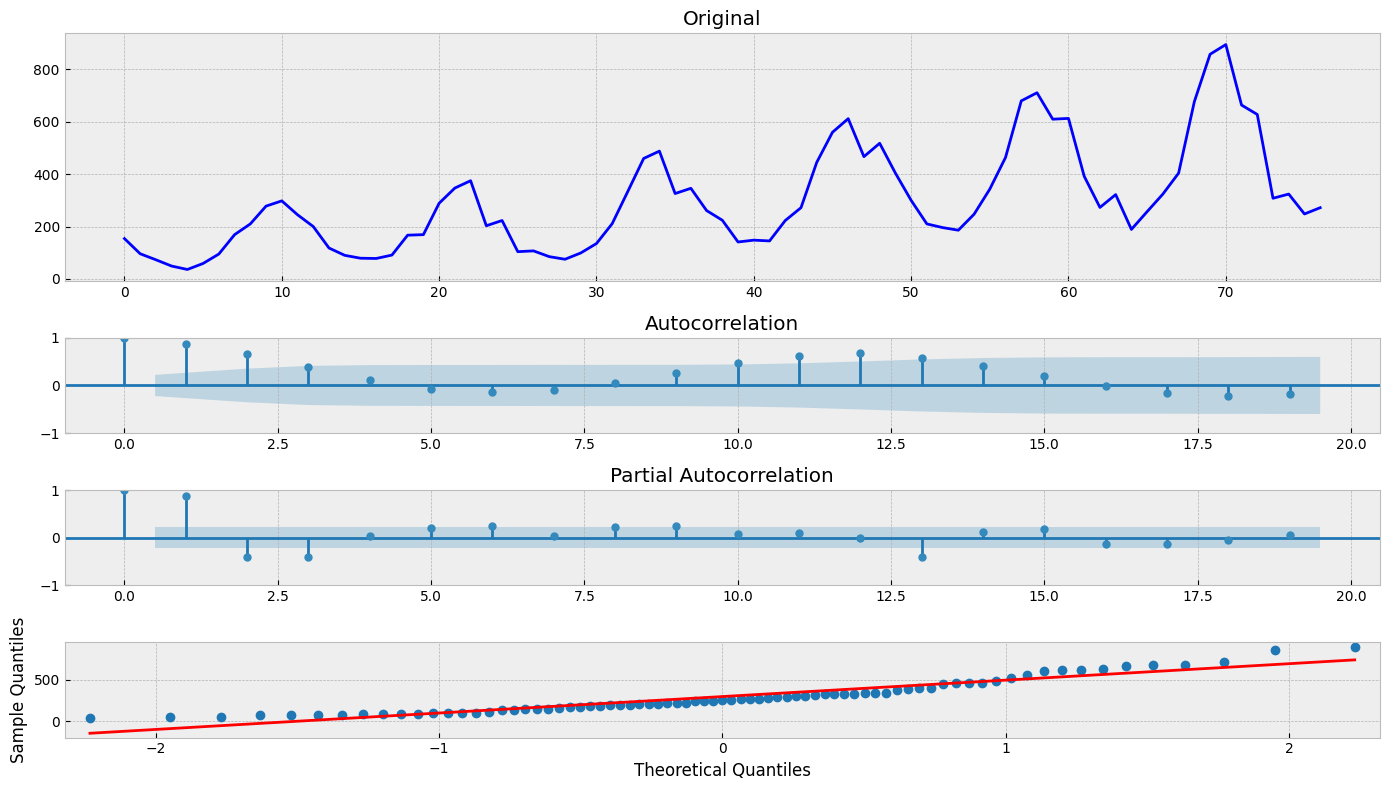

In [ ]:
tsplot(sales_of_company_x)

In [ ]:
from arch import arch_model

ModuleNotFoundError: No module named 'arch'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
sales_of_company_x = boxcox(sales_of_company_x, 0)
sales_of_company_x = sales_of_company_x[1:] - sales_of_company_x[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


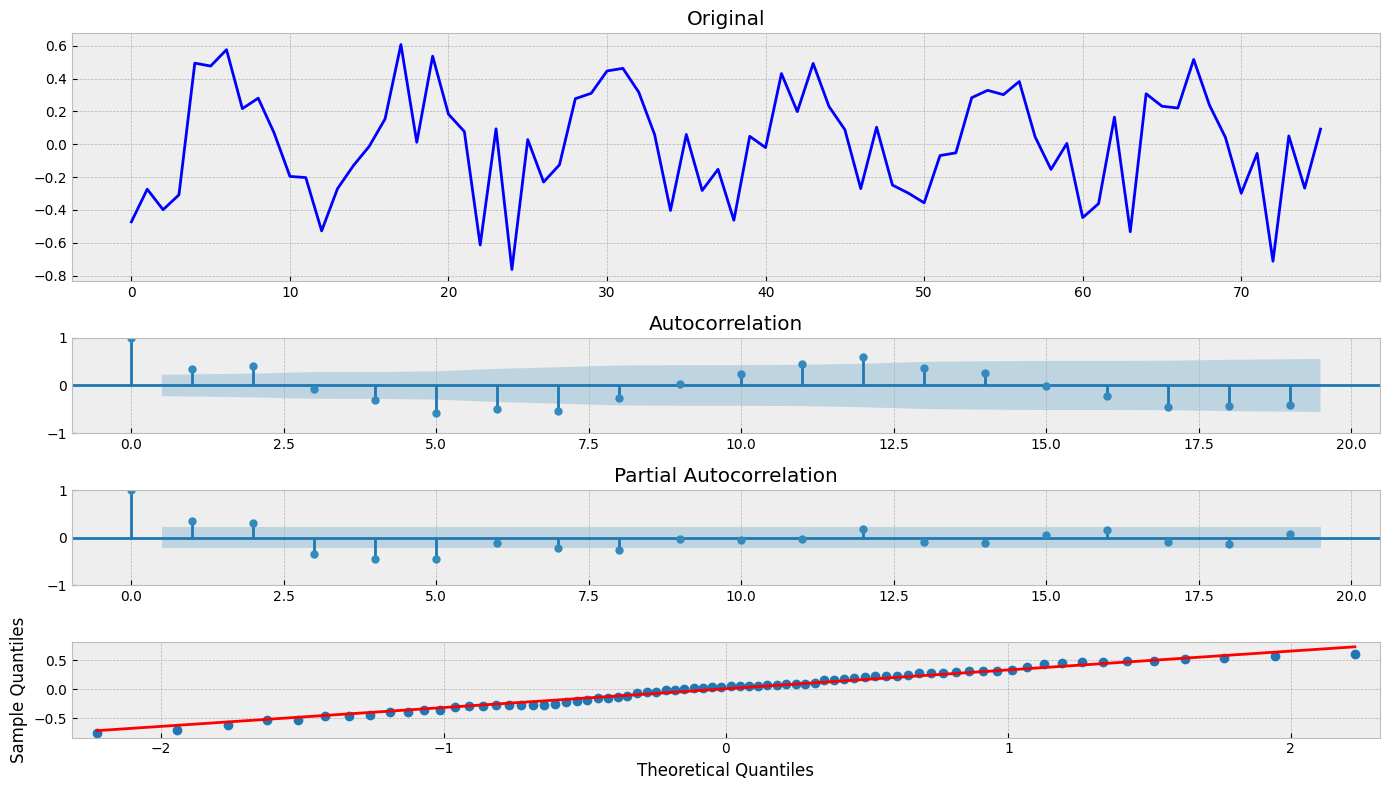

In [ ]:
tsplot(sales_of_company_x)

In [ ]:
model = sm.tsa.ARIMA(sales_of_company_x, order=(1, 0, 1))
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   76
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -16.441
Date:                Thu, 09 May 2024   AIC                             40.881
Time:                        12:54:08   BIC                             50.204
Sample:                             0   HQIC                            44.607
                                 - 76                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.064      0.025      0.980      -0.123       0.126
ar.L1          0.5800      0.244      2.377      0.017       0.102       1.058
ma.L1         -0.2353      0.279     -0.843      0.3

arch у меня никак не устанавливается. Поэтому я использовала модель ARIMA, которая не является чистой моделью GARCH, но предполагает условную гетероскедастичность через параметры ARIMA.

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.3 MB/s eta 0:00:00


In [ ]:
import arch

In [ ]:
garch_model = arch.arch_model(sales_of_company_x, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40957368.507308364
Iteration:      2,   Func. Count:     13,   Neg. LLF: 55.417676637801804
Iteration:      3,   Func. Count:     20,   Neg. LLF: 22.277592757445383
Iteration:      4,   Func. Count:     25,   Neg. LLF: 22.751551279959706
Iteration:      5,   Func. Count:     34,   Neg. LLF: 25.510016559297597
Iteration:      6,   Func. Count:     40,   Neg. LLF: 22.21401989111846
Iteration:      7,   Func. Count:     46,   Neg. LLF: 22.300608628384314
Iteration:      8,   Func. Count:     53,   Neg. LLF: 22.10393121306151
Iteration:      9,   Func. Count:     58,   Neg. LLF: 22.10308030966889
Iteration:     10,   Func. Count:     63,   Neg. LLF: 22.102941227270275
Iteration:     11,   Func. Count:     68,   Neg. LLF: 22.102929069129463
Iteration:     12,   Func. Count:     72,   Neg. LLF: 22.102929069375577
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.102929069129463
            Iterat

In [ ]:
print(garch_results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -22.1029
Distribution:                  Normal   AIC:                           52.2059
Method:            Maximum Likelihood   BIC:                           61.5288
                                        No. Observations:                   76
Date:                Thu, May 09 2024   Df Residuals:                       75
Time:                        13:02:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.4210e-03  3.682e-02      0.202      0.840 

In [ ]:
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

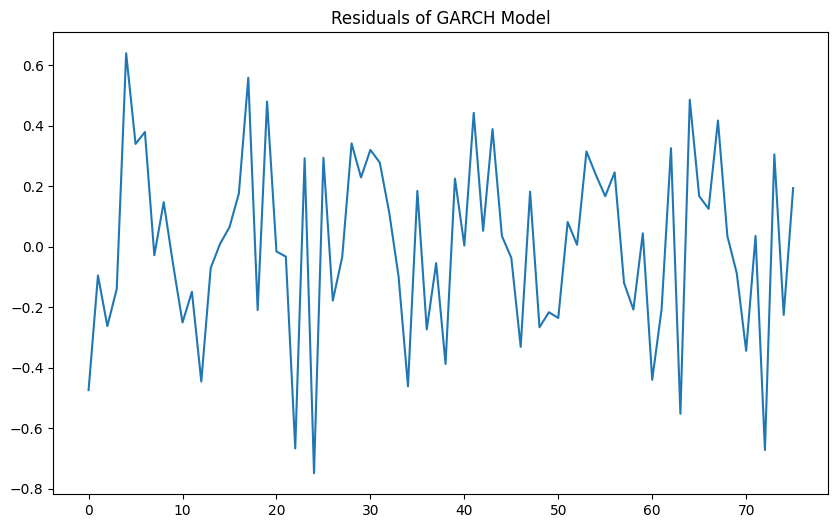

In [ ]:
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of GARCH Model')
plt.show()

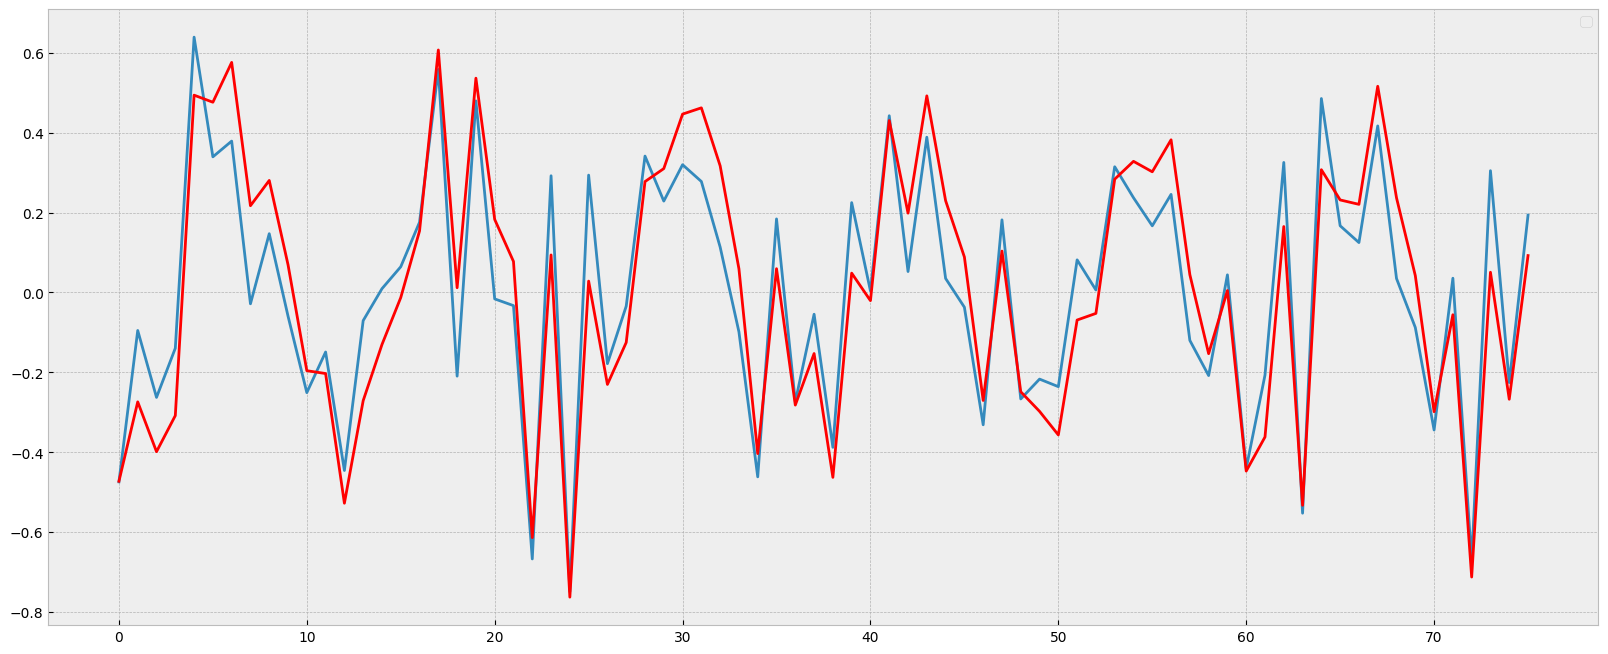

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(20,8))
    ax = plt.axes()
    plt.plot(residuals)
    plt.plot(sales_of_company_x, color='red')
    plt.legend()
    plt.show()